In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

In [2]:
# Reading all excel files data - 2015,2019,2022(Test and Train)
df_2015 = pd.read_excel('2015_clean_data.xlsx')
df_2019 = pd.read_excel('2019_clean_data.xlsx')
df_2022 = pd.read_excel('2022_clean_data_train.xlsx')

In [3]:
df_main = pd.concat([df_2015,df_2019,df_2022])

In [4]:
df_main.shape

(10146, 4)

In [5]:
df_main.columns

Index(['clean_text', 'Party', 'Textblob_Sentiments', 'Emotions'], dtype='object')

In [6]:
df_main.isnull().sum()

clean_text             58
Party                   0
Textblob_Sentiments     0
Emotions                0
dtype: int64

In [7]:
df_main = df_main.dropna()

In [8]:
df_main.sample(10)

,clean_text,Party,Textblob_Sentiments,Emotions
552,clearly the liberals and the ndp have failed t...,liberals,0.150000,Positive
4487,"the 🇨🇦 liberal party their confederates, new ""...",liberals,0.234091,Positive
303,ndp and liberals had it served to them on a si...,liberals,0.100000,Positive
2340,care explain odious fucksplat? really like kno...,unrelated tweets,0.200000,Positive
1902,elections will be cancelled until the war is o...,unrelated tweets,0.000000,Neutral
1644,cdnpoli elxn love canada,unrelated tweets,0.500000,Positive
1038,video facts harper's tpp sell-out truth ... ne...,ndp,0.000000,Neutral
3266,is so out of touch with reality thinks he’s ru...,liberals,0.200000,Positive
1860,The child benefit demonstrates the huge impact...,unrelated tweets,0.280000,Positive
524,what are you guys up to today? i am watching v...,unrelated tweets,-0.200000,Negative


Text(0.5, 1.0, 'Word Cloud on Total Clean_text')

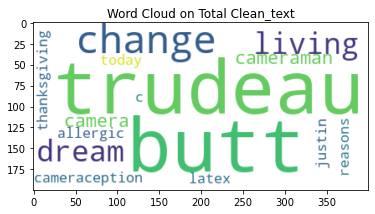

In [9]:
from wordcloud import WordCloud

text = str(df_main['clean_text'])
wc = WordCloud(max_words=15,background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Total Clean_text')

Text(0.5, 1.0, 'Word Cloud on Positive Tweets')

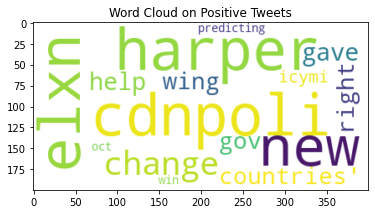

In [10]:
text = str(df_main.query("Emotions == 'Positive'")['clean_text'])
wc = WordCloud(max_words=15,background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Positive Tweets')

Text(0.5, 1.0, 'Word Cloud on Negative Tweets')

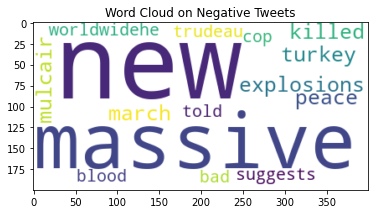

In [11]:
text = str(df_main.query("Emotions == 'Negative'")['clean_text'])
wc = WordCloud(max_words=15,background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Negative Tweets')

C:\Users\Akash Guje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


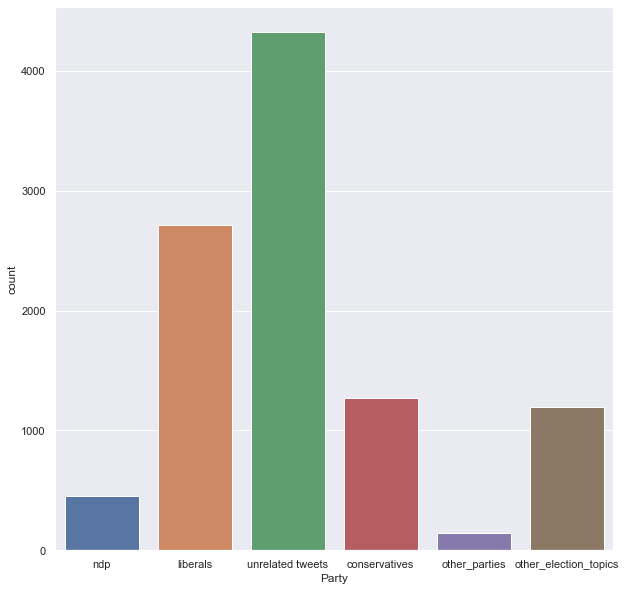

In [12]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.countplot(df_main["Party"])

Text(0.5, 1.0, 'Sentiments in 2019 election sentiments')

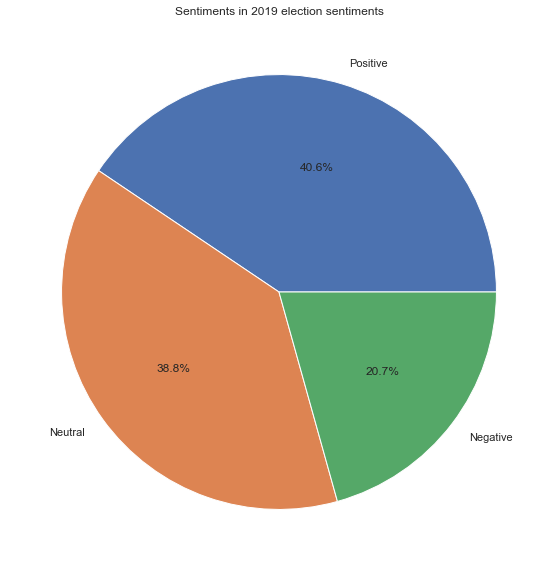

In [13]:
df1 = pd.DataFrame(df_main['Emotions'].value_counts().reset_index())
plt.pie(data=df1,x="Emotions",labels="index",autopct='%.1f%%')
plt.title("Sentiments in 2019 election sentiments")

In [14]:
X_train = df_main['clean_text']
Y_train = df_main['Emotions']

In [15]:
print(X_train.shape)
print(Y_train.shape)

(10088,)
(10088,)


In [16]:
#Vectorizing

cv = CountVectorizer(binary=False,min_df=0.0,max_df=1.0,ngram_range=(1,2))
tv = TfidfVectorizer(use_idf=True,min_df=0.0,max_df=1.0,ngram_range=(1,2),sublinear_tf=True)


cv_train_features = cv.fit_transform(X_train)
tf_train_features = tv.fit_transform(X_train)

In [17]:
print('BOW Model Train Features Shape:',cv_train_features.shape)
print('Tfidf Model Train Features Shape:',tf_train_features.shape)

BOW Model Train Features Shape: (10088, 116544)
Tfidf Model Train Features Shape: (10088, 116544)


# Loading Test Data and Vectorization

In [18]:
#Loading and Transforming Test Data

df_test = pd.read_excel('2022_clean_data_test.xlsx')

In [19]:
df_test.shape

(6383, 4)

In [20]:
df_test.columns

Index(['clean_text', 'Party', 'Textblob_Sentiments', 'Emotions'], dtype='object')

In [21]:
df_test.isnull().sum()

clean_text             5
Party                  0
Textblob_Sentiments    0
Emotions               0
dtype: int64

In [22]:
df_test = df_test.dropna()

Text(0.5, 1.0, 'Word Cloud on Total Clean_text')

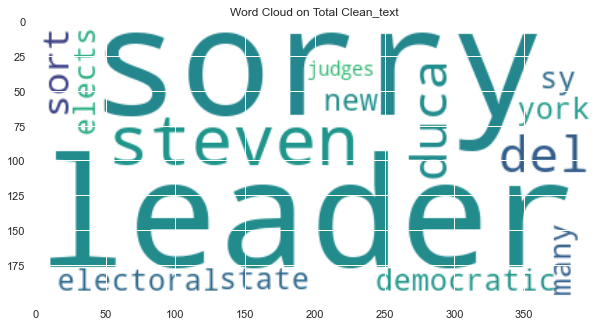

In [23]:
from wordcloud import WordCloud

text = str(df_test['clean_text'])
wc = WordCloud(max_words=15,background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Total Clean_text')

Text(0.5, 1.0, 'Word Cloud on Positive Tweets')

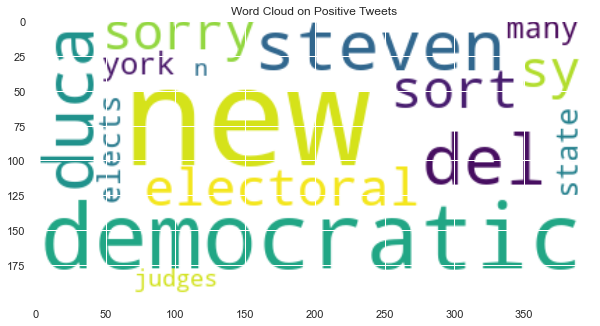

In [24]:
text = str(df_test.query("Emotions == 'Positive'")['clean_text'])
wc = WordCloud(max_words=15,background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Positive Tweets')

Text(0.5, 1.0, 'Word Cloud on Negative Tweets')

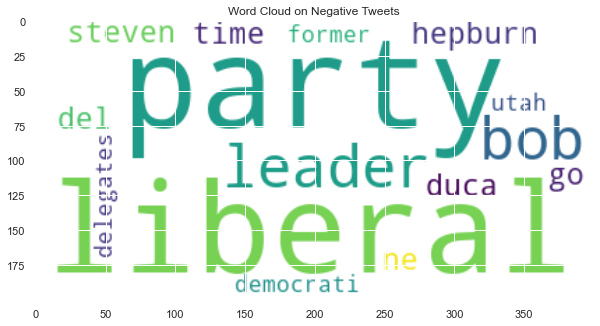

In [25]:
text = str(df_test.query("Emotions == 'Negative'")['clean_text'])
wc = WordCloud(max_words=15,background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Negative Tweets')

C:\Users\Akash Guje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


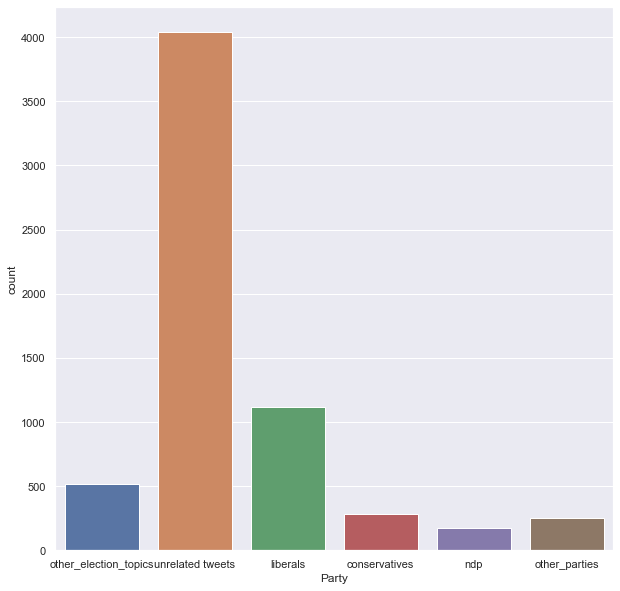

In [26]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.countplot(df_test["Party"])

Text(0.5, 1.0, 'Sentiments of election ')

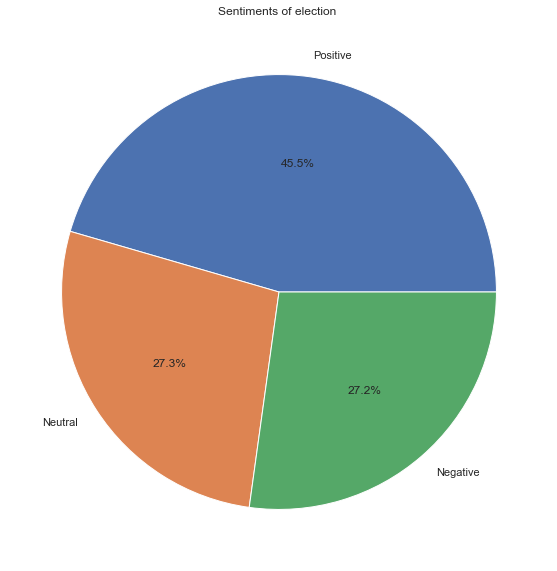

In [27]:
df1 = pd.DataFrame(df_test['Emotions'].value_counts().reset_index())
plt.pie(data=df1,x="Emotions",labels="index",autopct='%.1f%%')
plt.title("Sentiments of election ")

In [28]:
X_test = df_test['clean_text']
Y_test = df_test['Emotions']

In [29]:
print(X_test.shape)
print(Y_test.shape)

(6378,)
(6378,)


In [30]:
#Vectorizing
cv_test_features = cv.transform(X_test)
tf_test_features = tv.transform(X_test)

In [31]:
print('BOW Model Train Features Shape:',cv_test_features.shape)
print('Tfidf Model Train Features Shape:',tf_test_features.shape)

BOW Model Train Features Shape: (6378, 116544)
Tfidf Model Train Features Shape: (6378, 116544)


# Linear SVC GRID SEARCH

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# Model Implementation on Count Vectorizer

In [32]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

lr = LogisticRegression(penalty='l2',max_iter=100,C=1)
svm = SGDClassifier(loss='hinge',max_iter=100)

In [33]:
lr.fit(cv_train_features,Y_train)

C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [34]:
svm.fit(cv_train_features,Y_train)

SGDClassifier(max_iter=100)

In [35]:
Y_pred_lr_cv = lr.predict(cv_test_features)

In [36]:
Y_pred_svm_cv = svm.predict(cv_test_features)

In [50]:
from sklearn.metrics import accuracy_score,classification_report
print('Metrics with Logistic Regression :', accuracy_score(Y_pred_lr_cv,Y_test))
print(classification_report(Y_test,Y_pred_lr_cv)) 

Metrics with Logistic Regression : 0.7508623392913139
              precision    recall  f1-score   support

    Negative       0.74      0.51      0.60      1734
     Neutral       0.67      0.88      0.76      1742
    Positive       0.82      0.82      0.82      2902

    accuracy                           0.75      6378
   macro avg       0.74      0.74      0.73      6378
weighted avg       0.76      0.75      0.74      6378



In [47]:
print('Metrics with SGD Regression :', accuracy_score(Y_test,Y_pred_svm_cv))
print(classification_report(Y_test,Y_pred_svm_cv)) 

Metrics with SGD Regression : 0.674035747883349
              precision    recall  f1-score   support

    Negative       0.73      0.37      0.50      1734
     Neutral       0.53      0.94      0.68      1742
    Positive       0.84      0.69      0.76      2902

    accuracy                           0.67      6378
   macro avg       0.70      0.67      0.64      6378
weighted avg       0.73      0.67      0.67      6378



In [51]:
# Calculating Accuracy for Train Data
Y_pred_lr_cv_train = lr.predict(cv_train_features)
print('Metrics with Logistic Regression :', accuracy_score(Y_train,Y_pred_lr_cv_train))

Metrics with Logistic Regression : 0.8065027755749405


In [53]:
Y_pred_svm_cv_train = svm.predict(cv_train_features)
print('Metrics with SGD Regression :', accuracy_score(Y_train,Y_pred_svm_cv_train))

Metrics with SGD Regression : 0.869349722442506


# Model Implementation on Tfidf Vectorizer

In [39]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

lr = LogisticRegression(penalty='l2',max_iter=100,C=1)
svm = SGDClassifier(loss='hinge',max_iter=100)

In [40]:
lr.fit(tf_train_features,Y_train)

C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [41]:
svm.fit(tf_train_features,Y_train)

SGDClassifier(max_iter=100)

In [42]:
Y_pred_lr_tf = lr.predict(tf_test_features)

In [43]:
Y_pred_svm_tf = svm.predict(tf_test_features)

In [44]:
print('Metrics with Logistic Regression :', accuracy_score(Y_test,Y_pred_lr_tf))
print(classification_report(Y_test,Y_pred_lr_tf)) 

Metrics with Logistic Regression : 0.6415804327375353
              precision    recall  f1-score   support

    Negative       0.79      0.35      0.48      1734
     Neutral       0.81      0.41      0.54      1742
    Positive       0.59      0.96      0.73      2902

    accuracy                           0.64      6378
   macro avg       0.73      0.57      0.58      6378
weighted avg       0.70      0.64      0.61      6378



In [45]:
print('Metrics with SDG Regression :', accuracy_score(Y_test,Y_pred_svm_tf))
print(classification_report(Y_test,Y_pred_svm_tf)) 

Metrics with SDG Regression : 0.7133897773596739
              precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1734
     Neutral       0.86      0.48      0.61      1742
    Positive       0.67      0.93      0.78      2902

    accuracy                           0.71      6378
   macro avg       0.76      0.67      0.68      6378
weighted avg       0.74      0.71      0.70      6378



In [54]:
# Calculating Accuracy for Train Data
Y_pred_lr_tf_train = lr.predict(tf_train_features)
print('Metrics with Logistic Regression :', accuracy_score(Y_train,Y_pred_lr_tf_train))

Metrics with Logistic Regression : 0.9466693100713719


In [55]:
Y_pred_svm_tf_train = svm.predict(tf_train_features)
print('Metrics with Logistic Regression :', accuracy_score(Y_train,Y_pred_svm_tf_train))

Metrics with Logistic Regression : 0.9938540840602696
